In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

In [4]:
t = pd.read_csv('raw_data/train.csv')

campaign = pd.read_csv('raw_data/campaign_data.csv')

v = pd.read_csv('raw_data/test.csv')

In [12]:
print 'train set',t.shape
print 'campaigns',campaign.shape
print 'test set',v.shape

train set (1023191, 6)
campaigns (52, 9)
test set (773858, 4)


In [13]:
t.head()

,id,user_id,campaign_id,send_date,is_open,is_click
0,42_14051,14051,42,01-09-2017 19:55,0,0
1,52_134438,134438,52,02-11-2017 12:53,0,0
2,33_181789,181789,33,24-07-2017 15:15,0,0
3,44_231448,231448,44,05-09-2017 11:36,0,0
4,29_185580,185580,29,01-07-2017 18:01,0,0


In [14]:
campaign.head()

,campaign_id,communication_type,total_links,no_of_internal_links,no_of_images,no_of_sections,email_body,subject,email_url
0,29,Newsletter,67,61,12,3,"Dear AVians,\r\n \r\nWe are shaping up a super...",Sneak Peek: A look at the emerging data scienc...,http://r.newsletters.analyticsvidhya.com/7um44...
1,30,Upcoming Events,18,14,7,1,"Dear AVians,\r\n \r\nAre your eager to know wh...",[July] Data Science Expert Meetups & Competiti...,http://r.newsletters.analyticsvidhya.com/7up0e...
2,31,Conference,15,13,5,1,Early Bird Pricing Till August 07  Save upto ...,Last chance to convince your boss before the E...,http://r.newsletters.analyticsvidhya.com/7usym...
3,32,Conference,24,19,7,1,\r\n \r\nHi ?\r\n \r\nBefore I dive into why y...,A.I. & Machine Learning: 5 reasons why you sho...,http://r.newsletters.analyticsvidhya.com/7uthl...
4,33,Others,7,3,1,1,Fireside Chat with DJ Patil - the master is he...,"[Delhi NCR] Fireside Chat with DJ Patil, Forme...",http://r.newsletters.analyticsvidhya.com/7uvlg...


In [15]:
v.head()

,id,campaign_id,user_id,send_date
0,63_122715,63,122715,01-02-2018 22:35
1,56_76206,56,76206,02-01-2018 08:15
2,57_96189,57,96189,05-01-2018 18:25
3,56_166917,56,166917,02-01-2018 08:15
4,56_172838,56,172838,02-01-2018 08:12


In [20]:
t.user_id.value_counts() #user distribution

183177    20
145022    20
4118      19
216700    19
114180    19
197188    19
47152     19
163618    18
69970     18
196296    18
122065    18
218458    18
114075    18
38127     18
162109    18
67867     18
163399    18
156029    18
157374    18
36788     18
92799     18
49136     18
28463     18
160443    18
117705    18
86941     18
152991    18
143179    18
185773    18
111959    18
          ..
9258       1
1070       1
146480     1
60010      1
39524      1
48059      1
43618      1
156523     1
23463      1
21414      1
37685      1
230364     1
17199      1
134125     1
170356     1
182903     1
190842     1
178809     1
124304     1
85381      1
97281      1
171007     1
78593      1
228376     1
173048     1
185334     1
181236     1
2854       1
138223     1
188649     1
Name: user_id, Length: 168236, dtype: int64

In [70]:
t.campaign_id.value_counts() #campaign distribution

54    93943
53    85431
52    82160
49    81358
42    81253
36    73415
34    73112
30    69756
32    69624
29    69129
48    51456
33    46815
50    39710
44    39498
47    14230
46     9831
37     7559
38     7232
45     5322
40     4822
35     4121
51     3882
39     3487
31     3192
41     2786
43       67
Name: campaign_id, dtype: int64

In [71]:
campaign.communication_type.value_counts()

Hackathon          13
Corporate          12
Newsletter          9
Conference          8
Upcoming Events     7
Others              2
Webinar             1
Name: communication_type, dtype: int64

### Date visualization

In [42]:
#creating day,month and year columns in train
t['send_date'] = pd.to_datetime(t['send_date'],format = '%d-%m-%Y %H:%M')
t['day'] = t['send_date'].dt.day
t['month'] = t['send_date'].dt.month

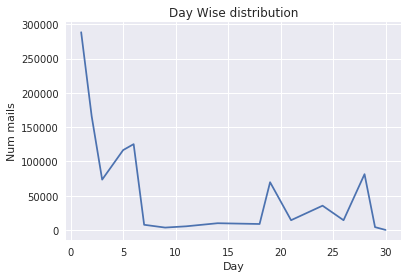

In [72]:
day_wise_val = t.day.value_counts().sort_index()

plt.plot(day_wise_val.index, day_wise_val.values)
plt.ylabel('Num mails')
plt.xlabel('Day')
plt.title("Day Wise distribution")
plt.show()

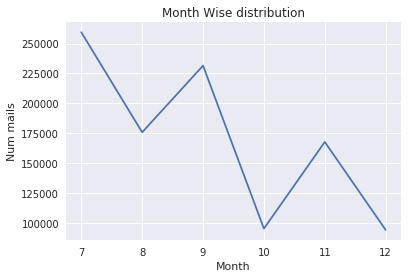

In [73]:
month_wise_val = t.month.value_counts().sort_index()

plt.plot(month_wise_val.index, month_wise_val.values)
plt.ylabel('Num mails')
plt.xlabel('Month')
plt.title("Month Wise distribution")
plt.show()

In [31]:
#merge the campaign information with train set
mails_train = t.join(campaign.set_index('campaign_id'), on='campaign_id',how='left')

In [32]:
mails_train[['campaign_id','communication_type']].drop_duplicates()['communication_type'].value_counts()

Conference         8
Newsletter         6
Hackathon          4
Upcoming Events    3
Corporate          2
Others             2
Webinar            1
Name: communication_type, dtype: int64

In [33]:
pd.crosstab(mails_train.communication_type,mails_train.is_open)

is_open,0,1
communication_type,,
Conference,302845,29788
Corporate,2477,376
Hackathon,23632,9633
Newsletter,413247,37806
Others,40688,10248
Upcoming Events,135254,13710
Webinar,2258,1229


In [34]:
#merge the campaign information with train set
mails_test = v.join(campaign.set_index('campaign_id'), on='campaign_id',how='left')

In [35]:
mails_test[['campaign_id','communication_type']].drop_duplicates()['communication_type'].value_counts()

Corporate          10
Hackathon           9
Upcoming Events     4
Newsletter          3
Name: communication_type, dtype: int64